## Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [1]:
import pandas as pd
import numpy as np
import env
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

In [2]:
url = env.get_url(env.user, env.host, env.password, database='zillow')

In [3]:
df = pd.read_sql('''
                    SELECT parcelid, bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, 
                           yearbuilt, taxamount, fips
                    FROM properties_2017
                    LEFT JOIN propertylandusetype
                    USING (propertylandusetypeid)
                    WHERE propertylandusedesc = 'Single Family Residential' ''', url)

KeyboardInterrupt: 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), int64(1)
memory usage: 131.4 MB


In [6]:
df.isnull().sum()

parcelid                           0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [7]:
df=df.dropna()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,2140235.0,1.304843e+07,4.568911e+06,10711725.00,11656531.50,12596047.00,14053101.50,1.681836e+08
bedroomcnt,2140235.0,3.301419e+00,9.325998e-01,0.00,3.00,3.00,4.00,2.500000e+01
bathroomcnt,2140235.0,2.240352e+00,9.905489e-01,0.00,2.00,2.00,3.00,3.200000e+01
calculatedfinishedsquarefeet,2140235.0,1.863194e+03,1.221754e+03,1.00,1258.00,1623.00,2208.00,9.525760e+05
taxvaluedollarcnt,2140235.0,4.606416e+05,6.771576e+05,22.00,189166.00,328296.00,534606.00,9.018846e+07
yearbuilt,2140235.0,1.960968e+03,2.215056e+01,1801.00,1949.00,1958.00,1976.00,2.016000e+03
taxamount,2140235.0,5.616711e+03,7.814563e+03,6.34,2540.85,4111.47,6411.93,1.078102e+06
fips,2140235.0,6.048310e+03,2.034491e+01,6037.00,6037.00,6037.00,6059.00,6.111000e+03


<Figure size 1152x216 with 0 Axes>

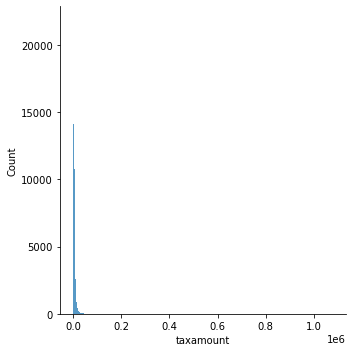

In [15]:
plt.figure(figsize=(16, 3))
sns.displot(data=df, x='taxamount')
plt.show()

### Create functions to acquire and prep zillow data, put in wrangle.py file, and test

In [17]:
def wrangle_zillow():
    url = env.get_url(env.user, env.host, env.password, database='zillow')
    df = pd.read_sql('''
                    SELECT parcelid, bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, 
                           yearbuilt, taxamount, fips
                    FROM properties_2017
                    LEFT JOIN propertylandusetype
                    USING (propertylandusetypeid)
                    WHERE propertylandusedesc = 'Single Family Residential' ''', url)
    
    df=df.dropna()

In [4]:
df = wrangle.get_zillow()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855285 entries, 0 to 1855284
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), int64(1)
memory usage: 113.2 MB


### Look at distribution of numerical values

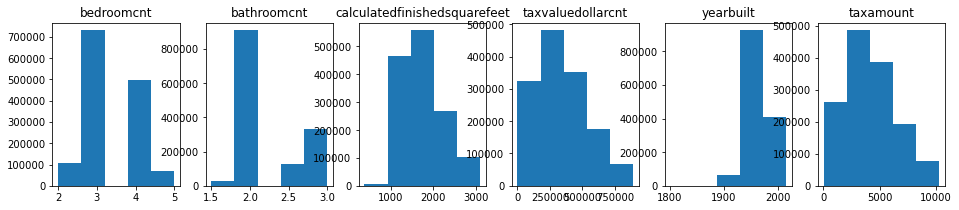

In [10]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount']

for i, col in enumerate(cols):
    subplot_num = i+1
    plt.subplot(1,6,subplot_num)
    plt.title(col)
    df[col].hist(bins=5)
    plt.grid(False)

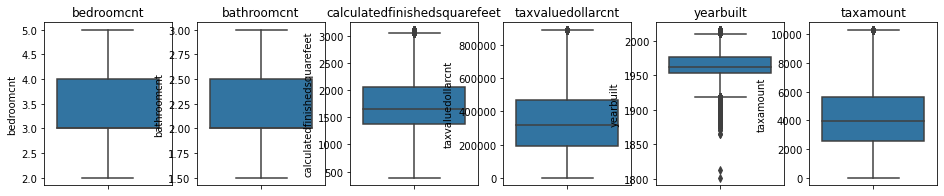

In [9]:
plt.figure(figsize=(16,3))
for i, col in enumerate(cols):
    subplot_num = i+1
    plt.subplot(1,6,subplot_num)
    plt.title(col)
    sns.boxplot(data=df, y=col)
    plt.grid(False)

In [16]:
# function to remove outliers (add to wrangle.py)

def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [8]:
df = wrangle.remove_outliers(df, 1.5, ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 
                                       'taxamount'])


In [15]:
df.to_csv('zillow.csv', index=False)